In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Taken from https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)

class SolutionPath:
    def __init__(self, fname):
        print(fname)
        data = np.genfromtxt(fname, delimiter=" ")
        self.pos = data[:, 0:3]
        self.rot = data[:, 3:8]

## Defining the Environment

In [2]:
obs_pos = [(5,0,0)]
obs_size = [(5,5,5)]

## Loading in the Solution Trajectory

In [3]:
p = SolutionPath("../solution.txt")

../solution.txt


## Ploting the Solution Trajectory

interactive(children=(IntSlider(value=0, description='step', max=56), Output()), _dom_classes=('widget-interac…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
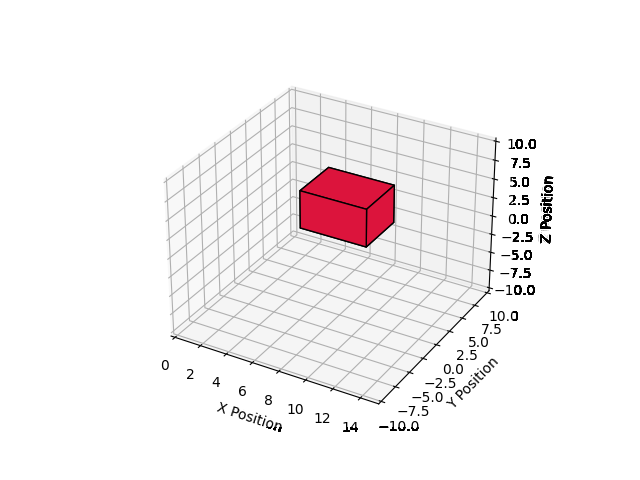

In [7]:
ax = plt.axes(projection="3d")
pc = plotCubeAt2(obs_pos, obs_size, color = "crimson", edgecolor = "k")
def update(step = 0):
    ax.clear()
    ax.add_collection3d(pc)
    ax.set_xlim(0, 15)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.plot3D(p.pos[0:step, 0], p.pos[0:step, 1], p.pos[0:step, 2])
    
interact(update, step = (0,len(p.pos), 1))
plt.show()